# Load the dataset

In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv", index_col=0)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
print(train_data.shape)

(1460, 80)
(1459, 79)


In [20]:
# train_data["LotArea"].to_numpy().astype("float32")

array([ 8450.,  9600., 11250., ...,  9042.,  9717.,  9937.], dtype=float32)

# Visualize the dataset

## Parameters to use:

- First priority: GrLivArea, OverallQual, TotalBsmtSF, bsmtqual, bsmtcond, KitchenQual, TotRmsAbrGrd, TotBath(self-added feature), PavedDrive
- Second priority: MSSubClass, MsZoning, YearBuilt, remodeled?(one hot), Lotfrontage, street, alley, neighborhood, condition1, condition2, exterqual, extercond, OverallCond, Heating, HeatinQC, CentralAir, Electrical, Fireplace, FireplaceQu, Fence, SaleType, SaleCondition
- Third priority: lotshape, landcontour, lotconfig, landslope, bldgtype, housestyle, masvnrarea, masvnrtype

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
""" takes a name of column(if the column is not given)
    calculate the average house prices and standard deviation1 of each value in that column and append them into lists
"""
def get_avg_std(column_name, column=None):
    if column == None:
        val_lst = sorted(train_data[column_name].unique())
    else:
        val_lst = sorted(column)
    price_average = []
    std_average = []
    for val in val_lst:
        price = train_data[train_data[column_name] == val]["SalePrice"]
        price_average.append(price.mean())
        std_average.append(price.std())
    return val_lst, price_average, std_average

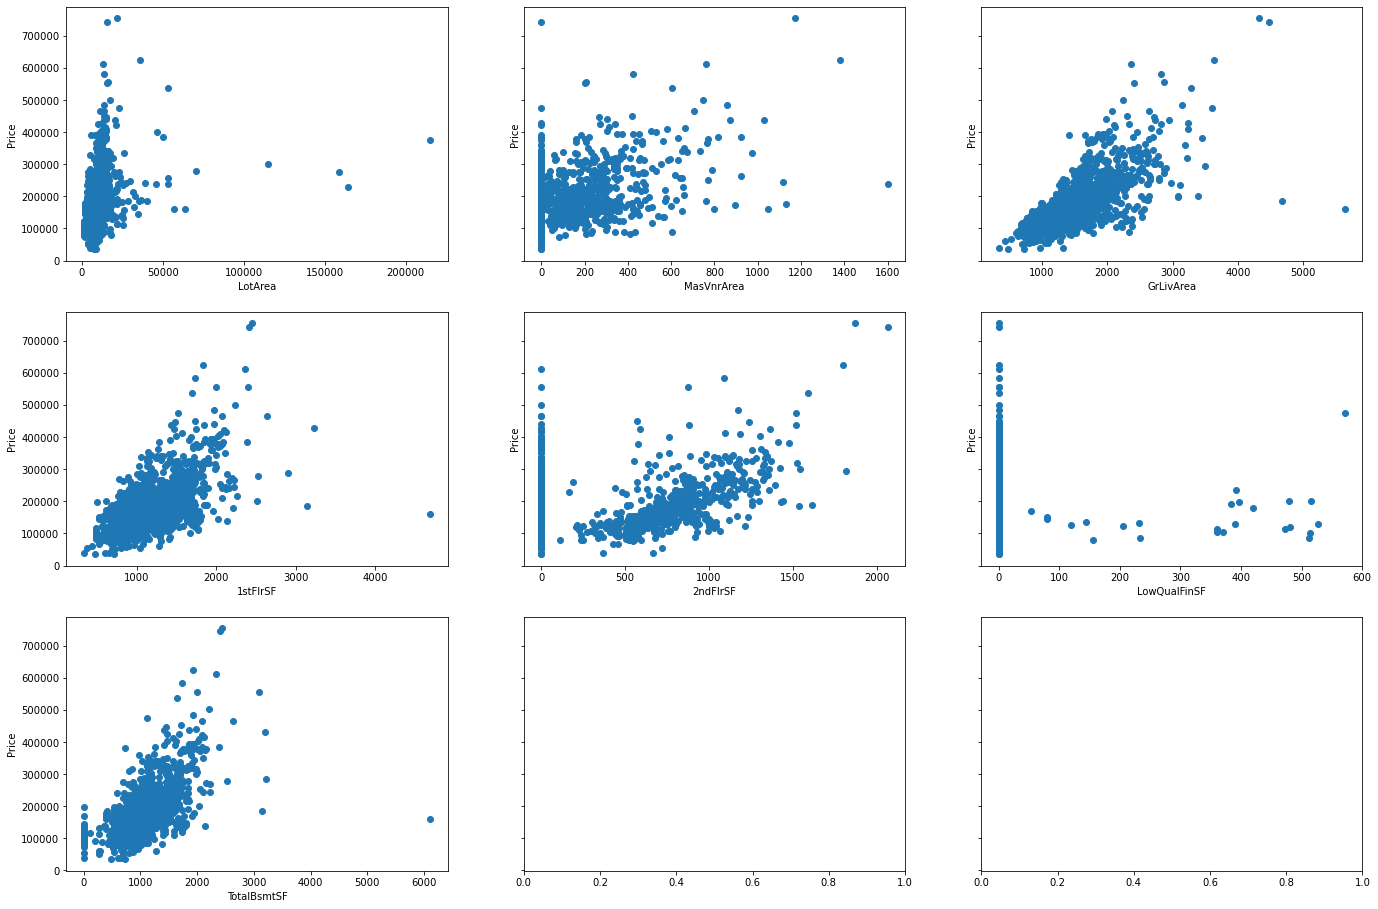

In [5]:
# look for relationship between house area and prices
fig, axes = plt.subplots(3, 3, sharey=True)

axes[0][0].scatter(train_data["LotArea"], train_data["SalePrice"])
axes[0][0].set_xlabel("LotArea")
axes[0][0].set_ylabel("Price")

axes[0][1].scatter(train_data["MasVnrArea"], train_data["SalePrice"])
axes[0][1].set_xlabel("MasVnrArea")
axes[0][1].set_ylabel("Price")

axes[0][2].scatter(train_data["GrLivArea"], train_data["SalePrice"])
axes[0][2].set_xlabel("GrLivArea")
axes[0][2].set_ylabel("Price")

axes[1][0].scatter(train_data["1stFlrSF"], train_data["SalePrice"])
axes[1][0].set_xlabel("1stFlrSF")
axes[1][0].set_ylabel("Price")

axes[1][1].scatter(train_data["2ndFlrSF"], train_data["SalePrice"])
axes[1][1].set_xlabel("2ndFlrSF")
axes[1][1].set_ylabel("Price")

axes[1][2].scatter(train_data["LowQualFinSF"], train_data["SalePrice"])
axes[1][2].set_xlabel("LowQualFinSF")
axes[1][2].set_ylabel("Price")

axes[2][0].scatter(train_data["TotalBsmtSF"], train_data["SalePrice"])
axes[2][0].set_xlabel("TotalBsmtSF")
axes[2][0].set_ylabel("Price")
plt.subplots_adjust(left=0, right=3, top=3, bottom=0)

plt.show()

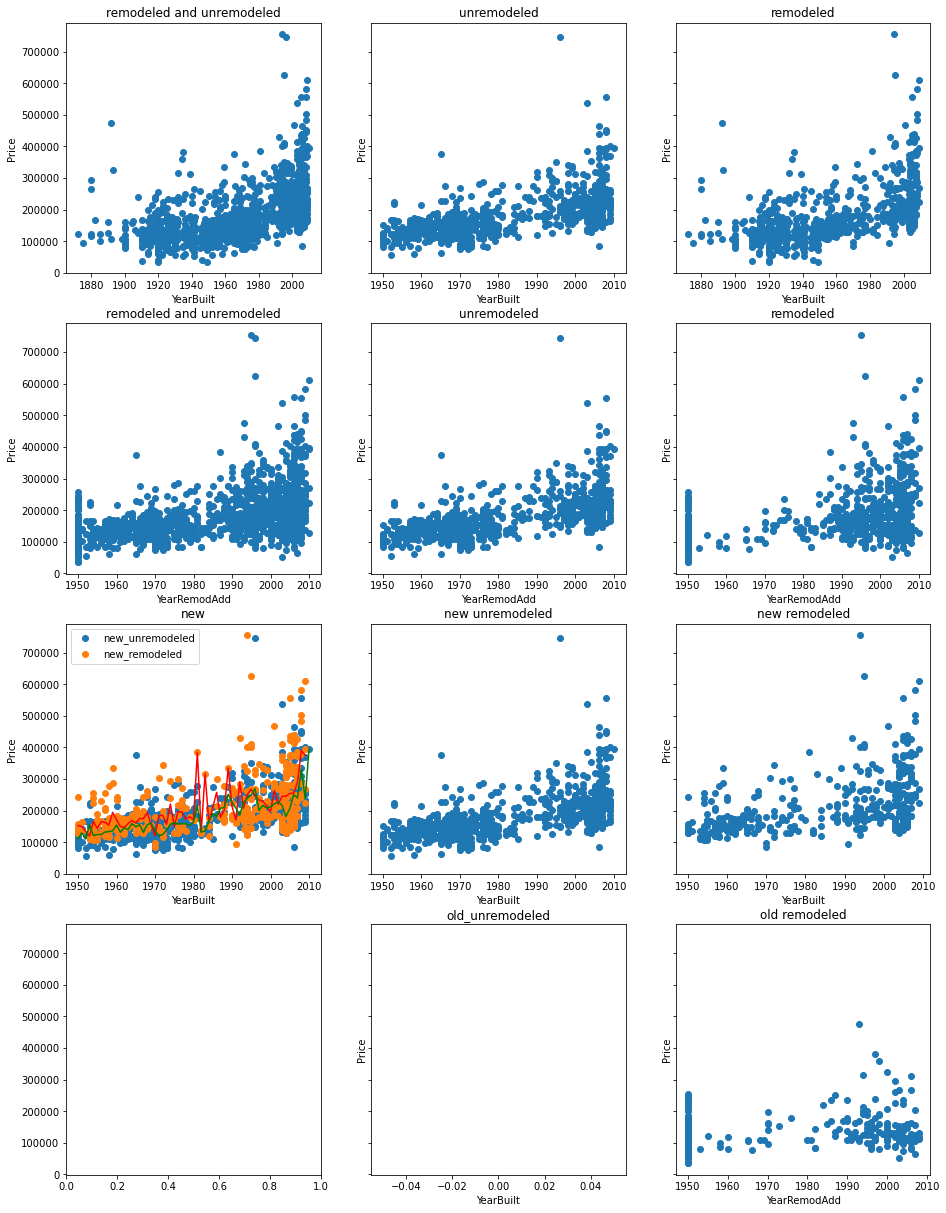

In [46]:
# look for relationship between yearbuilt, yearremod, and salesprice

# check difference between remodeled and unremodeled
remodeled = train_data[train_data["YearBuilt"] != train_data["YearRemodAdd"]]
unremodeled = train_data[train_data["YearBuilt"] == train_data["YearRemodAdd"]]

# check difference between unremodeled and remodeled houses of < 1950 and >= 1950
new_unremodeled = train_data.query('YearBuilt >= 1950 & YearBuilt == YearRemodAdd')
old_unremodeled = train_data.query('YearBuilt < 1950 & YearBuilt == YearRemodAdd')
new_remodeled = train_data.query('YearBuilt >= 1950 & YearBuilt != YearRemodAdd')
old_remodeled = train_data.query('YearBuilt < 1950 & YearBuilt != YearRemodAdd')

new_re_yr = sorted(new_remodeled["YearBuilt"].unique())
new_re_avg_p = []
for yr in new_re_yr:
    price = new_remodeled[new_remodeled["YearBuilt"] == yr]["SalePrice"].mean()
    new_re_avg_p.append(price)

new_unre_yr = sorted(new_unremodeled["YearBuilt"].unique())
new_unre_avg_p = []
for yr in new_unre_yr:
    price = new_unremodeled[new_unremodeled["YearBuilt"] == yr]["SalePrice"].mean()
    new_unre_avg_p.append(price)

fig, axs = plt.subplots(4, 3, sharey=True)

axs[0][0].scatter(train_data["YearBuilt"], train_data["SalePrice"])
axs[0][0].set_title("remodeled and unremodeled")
axs[0][0].set_xlabel("YearBuilt")
axs[0][0].set_ylabel("Price")

axs[0][1].scatter(unremodeled["YearBuilt"], unremodeled["SalePrice"])
axs[0][1].set_title("unremodeled")
axs[0][1].set_xlabel("YearBuilt")
axs[0][1].set_ylabel("Price")

axs[0][2].scatter(remodeled["YearBuilt"], remodeled["SalePrice"])
axs[0][2].set_title("remodeled")
axs[0][2].set_xlabel("YearBuilt")
axs[0][2].set_ylabel("Price")

axs[1][0].scatter(train_data["YearRemodAdd"], train_data["SalePrice"])
axs[1][0].set_title("remodeled and unremodeled")
axs[1][0].set_xlabel("YearRemodAdd")
axs[1][0].set_ylabel("Price")

axs[1][1].scatter(unremodeled["YearRemodAdd"], unremodeled["SalePrice"])
axs[1][1].set_title("unremodeled")
axs[1][1].set_xlabel("YearRemodAdd")
axs[1][1].set_ylabel("Price")

axs[1][2].scatter(remodeled["YearRemodAdd"], remodeled["SalePrice"])
axs[1][2].set_title("remodeled")
axs[1][2].set_xlabel("YearRemodAdd")
axs[1][2].set_ylabel("Price")

axs[2][0].scatter(new_unremodeled["YearBuilt"], new_unremodeled["SalePrice"], label="new_unremodeled")
axs[2][0].scatter(new_remodeled["YearBuilt"], new_remodeled["SalePrice"], label="new_remodeled")
axs[2][0].plot(new_re_yr, new_re_avg_p, "r-")
axs[2][0].plot(new_unre_yr, new_unre_avg_p, "g-")
axs[2][0].set_title("new")
axs[2][0].set_xlabel("YearBuilt")
axs[2][0].set_ylabel("Price")
axs[2][0].legend()

axs[2][1].scatter(new_unremodeled["YearBuilt"], new_unremodeled["SalePrice"])
axs[2][1].set_title("new unremodeled")
axs[2][1].set_xlabel("YearBuilt")
axs[2][1].set_ylabel("Price")

axs[2][2].scatter(new_remodeled["YearBuilt"], new_remodeled["SalePrice"])
axs[2][2].set_title("new remodeled")
axs[2][2].set_xlabel("YearBuilt")
axs[2][2].set_ylabel("Price")

axs[3][1].scatter(old_unremodeled["YearBuilt"], old_unremodeled["SalePrice"])
axs[3][1].set_title("old_unremodeled")
axs[3][1].set_xlabel("YearBuilt")
axs[3][1].set_ylabel("Price")

axs[3][2].scatter(old_remodeled["YearRemodAdd"], old_remodeled["SalePrice"])
axs[3][2].set_title("old remodeled")
axs[3][2].set_xlabel("YearRemodAdd")
axs[3][2].set_ylabel("Price")



plt.subplots_adjust(left=0, right=2, top=4, bottom=0)
plt.show()




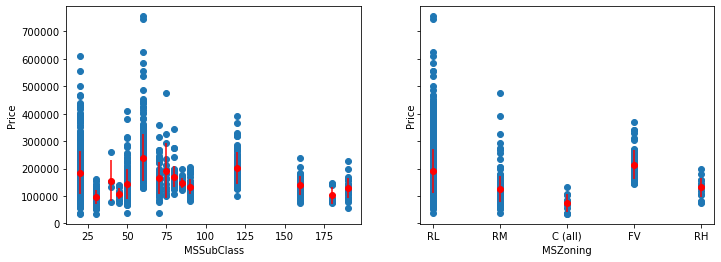

max: 214014.06153846154, min: 74528.0
max: 239948.5016722408, min: 95829.72463768115


In [7]:
# look for relationship of house type and prices
msSubClass, class_price_average, class_std_average = get_avg_std("MSSubClass")
msZoning, zoning_price_average, zoning_std_average = get_avg_std("MSZoning")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(train_data["MSSubClass"], train_data["SalePrice"])
ax1.errorbar(msSubClass, class_price_average, yerr=class_std_average, fmt="ro", label="avg_price")
ax1.set_xlabel("MSSubClass")
ax1.set_ylabel("Price")

ax2.scatter(train_data["MSZoning"], train_data["SalePrice"])
ax2.errorbar(msZoning, zoning_price_average, yerr=zoning_std_average, fmt="ro", label="avg_price")
ax2.set_xlabel("MSZoning")
ax2.set_ylabel("Price")
plt.subplots_adjust(left=0, right=1.5)

plt.show()

print(f"max: {max(zoning_price_average)}, min: {min(zoning_price_average)}")

print(f"max: {max(class_price_average)}, min: {min(class_price_average)}")

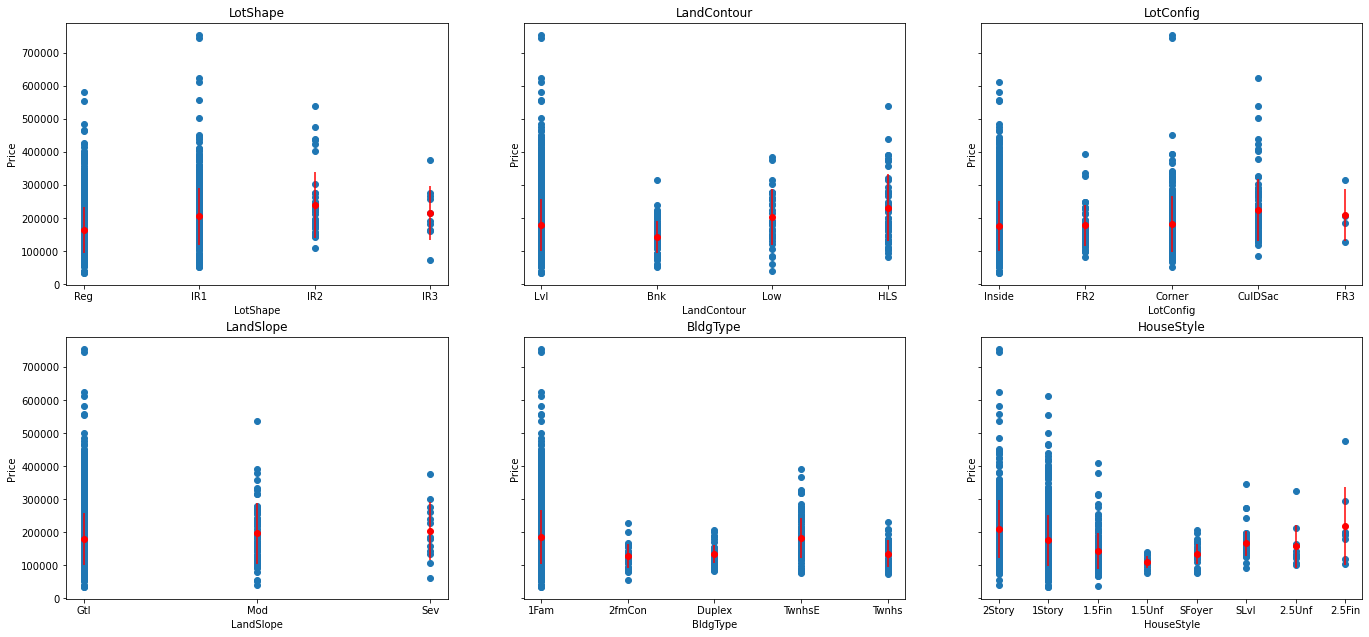

In [8]:
fig, axes = plt.subplots(2, 3, sharey=True)

LotShape, LotShape_price_average, LotShape_std_average = get_avg_std("LotShape")
LandContour, LandContour_price_average, LandContour_std_average = get_avg_std("LandContour")
LotConfig, LotConfig_price_average, LotConfig_std_average = get_avg_std("LotConfig")
LandSlope, LandSlope_price_average, LandSlope_std_average = get_avg_std("LandSlope")
BldgType, BldgType_price_average, BldgType_std_average = get_avg_std("BldgType")
HouseStyle, HouseStyle_price_average, HouseStyle_std_average = get_avg_std("HouseStyle")

axes[0][0].scatter(train_data["LotShape"], train_data["SalePrice"])
axes[0][0].errorbar(LotShape, LotShape_price_average, yerr=LotShape_std_average, fmt="ro", label="avg_price")
axes[0][0].set_title("LotShape")
axes[0][0].set_xlabel("LotShape")
axes[0][0].set_ylabel("Price")

axes[0][1].scatter(train_data["LandContour"], train_data["SalePrice"])
axes[0][1].errorbar(LandContour, LandContour_price_average, yerr=LandContour_std_average, fmt="ro", label="avg_price")
axes[0][1].set_title("LandContour")
axes[0][1].set_xlabel("LandContour")
axes[0][1].set_ylabel("Price")

axes[0][2].scatter(train_data["LotConfig"], train_data["SalePrice"])
axes[0][2].errorbar(LotConfig, LotConfig_price_average, yerr=LotConfig_std_average, fmt="ro", label="avg_price")
axes[0][2].set_title("LotConfig")
axes[0][2].set_xlabel("LotConfig")
axes[0][2].set_ylabel("Price")

axes[1][0].scatter(train_data["LandSlope"], train_data["SalePrice"])
axes[1][0].errorbar(LandSlope, LandSlope_price_average, yerr=LandSlope_std_average, fmt="ro", label="avg_price")
axes[1][0].set_title("LandSlope")
axes[1][0].set_xlabel("LandSlope")
axes[1][0].set_ylabel("Price")

axes[1][1].scatter(train_data["BldgType"], train_data["SalePrice"])
axes[1][1].errorbar(BldgType, BldgType_price_average, yerr=BldgType_std_average, fmt="ro", label="avg_price")
axes[1][1].set_title("BldgType")
axes[1][1].set_xlabel("BldgType")
axes[1][1].set_ylabel("Price")

axes[1][2].scatter(train_data["HouseStyle"], train_data["SalePrice"])
axes[1][2].errorbar(HouseStyle, HouseStyle_price_average, yerr=HouseStyle_std_average, fmt="ro", label="avg_price")
axes[1][2].set_title("HouseStyle")
axes[1][2].set_xlabel("HouseStyle")
axes[1][2].set_ylabel("Price")

plt.subplots_adjust(left=0, right=3, top=2, bottom=0)
plt.show()

C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


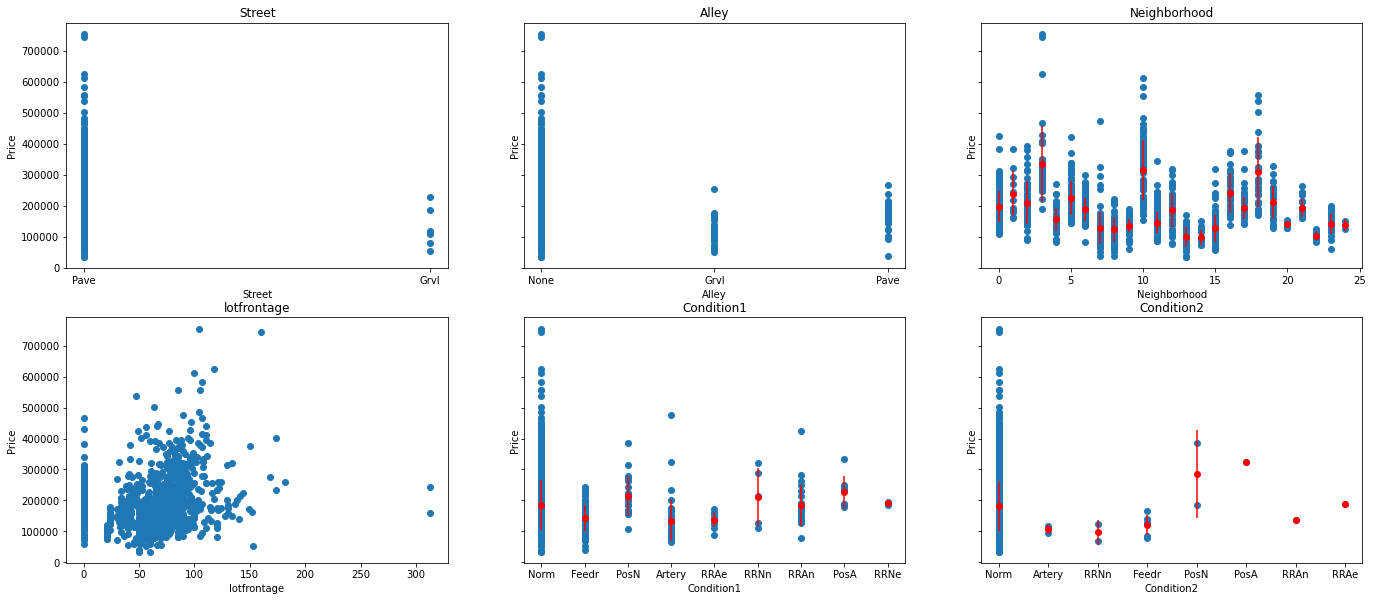

In [9]:
# check relationship between properties around houses (lotfrontage, street, alley, neighborhood, condition1, condition2)
fig, axes = plt.subplots(2, 3, sharey=True)



alley = train_data.replace({np.nan:"None"}, inplace=False)["Alley"]
street = train_data["Street"]
lotfrontage = train_data.replace({np.nan:0}, inplace=False)["LotFrontage"]
neighborhood = train_data["Neighborhood"]


Neighborhood, neighborhood_avg, neighborhood_std = get_avg_std("Neighborhood")
Condition1, Condition1_avg, Condition1_std = get_avg_std("Condition1")
Condition2, Condition2_avg, Condition2_std = get_avg_std("Condition2")

neighborhood_dict = {val: idx for idx, val in enumerate(neighborhood.unique())}
neighborhood = neighborhood.replace(neighborhood_dict, inplace=False)
Neighborhood = list(map(lambda x: neighborhood_dict[x], Neighborhood))

axes[0][0].scatter(street, train_data["SalePrice"])
axes[0][0].set_title("Street")
axes[0][0].set_xlabel("Street")
axes[0][0].set_ylabel("Price")

axes[0][1].scatter(alley, train_data["SalePrice"])
axes[0][1].set_title("Alley")
axes[0][1].set_xlabel("Alley")
axes[0][1].set_ylabel("Price")

axes[0][2].scatter(neighborhood, train_data["SalePrice"])
axes[0][2].errorbar(Neighborhood, neighborhood_avg, yerr=neighborhood_std, fmt="ro", label="avg_price")
axes[0][2].set_title("Neighborhood")
axes[0][2].set_xlabel("Neighborhood")
axes[0][2].set_ylabel("Price")

axes[1][0].scatter(lotfrontage, train_data["SalePrice"])
axes[1][0].set_title("lotfrontage")
axes[1][0].set_xlabel("lotfrontage")
axes[1][0].set_ylabel("Price")

axes[1][1].scatter(train_data["Condition1"], train_data["SalePrice"])
axes[1][1].errorbar(Condition1, Condition1_avg, yerr=Condition1_std, fmt="ro", label="avg_price")
axes[1][1].set_title("Condition1")
axes[1][1].set_xlabel("Condition1")
axes[1][1].set_ylabel("Price")

axes[1][2].scatter(train_data["Condition2"], train_data["SalePrice"])
axes[1][2].errorbar(Condition2, Condition2_avg, yerr=Condition2_std, fmt="ro", label="avg_price")
axes[1][2].set_title("Condition2")
axes[1][2].set_xlabel("Condition2")
axes[1][2].set_ylabel("Price")

plt.subplots_adjust(left=0, right=3, top=2)
plt.show()


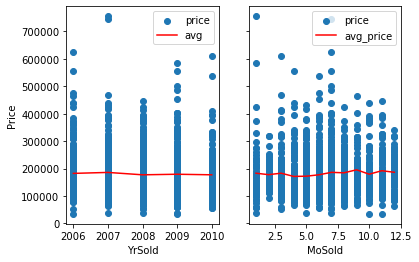

In [10]:
# yrsold and mosold has no relationship to saleprice
yr_price_average = []
for yr in range(2006, 2011):
    yr_price_average.append(train_data[train_data["YrSold"] == yr]["SalePrice"].mean())
    
mo_price_average = []
for mo in range(1, 13):
    mo_price_average.append(train_data[train_data["MoSold"] == mo]["SalePrice"].mean())

fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].scatter(train_data["YrSold"], train_data["SalePrice"], label="price")
axs[0].plot(range(2006, 2011), yr_price_average, "r", label="avg")
axs[0].set_xlabel("YrSold")
axs[0].set_ylabel("Price")
axs[0].legend()

axs[1].scatter(train_data["MoSold"], train_data["SalePrice"], label="price")
axs[1].plot(range(1, 13), mo_price_average, "r", label="avg_price")
axs[1].set_xlabel("MoSold")
axs[1].legend()
plt.show()

C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, wh

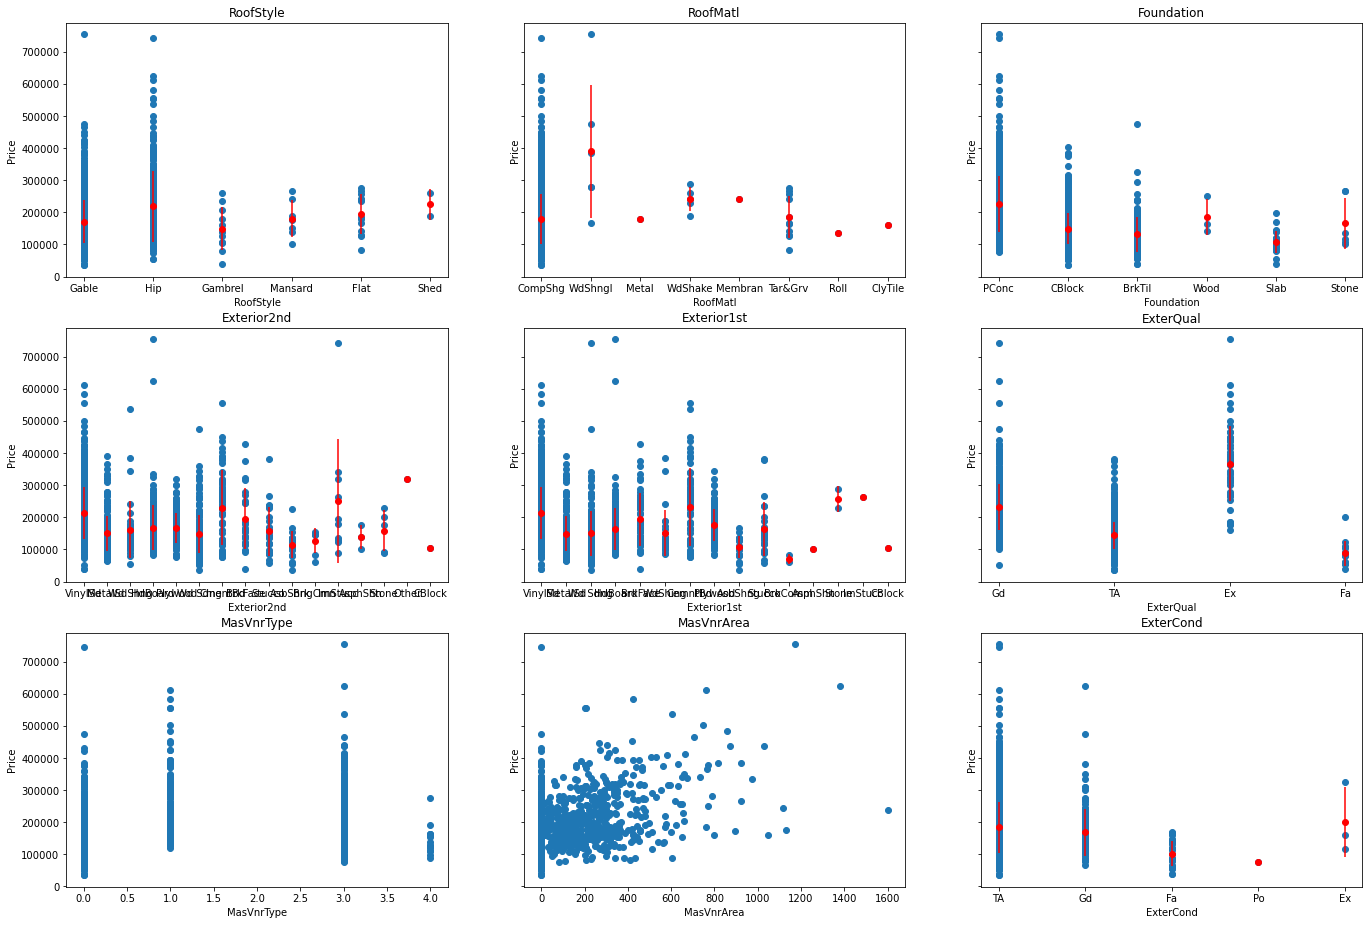

In [11]:
# check relationships of house exteriors and prices
MasVnrType = train_data.replace({"Stone": 1, "CBlock": 2, "BrkFace": 3, "BrkCmn": 4, "None":0}, inplace=False)["MasVnrType"]

fig, axes = plt.subplots(3, 3, sharey=True)

RoofStyle, RoofStyle_avg, RoofStyle_std = get_avg_std("RoofStyle")
RoofMatl, RoofMatl_avg, RoofMatl_std = get_avg_std("RoofMatl")
Foundation, Foundation_avg, Foundation_std = get_avg_std("Foundation")
Exterior2nd, Exterior2nd_avg, Exterior2nd_std = get_avg_std("Exterior2nd")
Exterior1st, Exterior1st_avg, Exterior1st_std = get_avg_std("Exterior1st")
ExterQual, ExterQual_avg, ExterQual_std = get_avg_std("ExterQual")
ExterCond, ExterCond_avg, ExterCond_std = get_avg_std("ExterCond")

axes[0][0].scatter(train_data["RoofStyle"], train_data["SalePrice"])
axes[0][0].errorbar(RoofStyle, RoofStyle_avg, yerr=RoofStyle_std, fmt="ro", label="avg_price")
axes[0][0].set_title("RoofStyle")
axes[0][0].set_xlabel("RoofStyle")
axes[0][0].set_ylabel("Price")

axes[0][1].scatter(train_data["RoofMatl"], train_data["SalePrice"])
axes[0][1].errorbar(RoofMatl,RoofMatl_avg, yerr=RoofMatl_std, fmt="ro", label="avg_price")
axes[0][1].set_title("RoofMatl")
axes[0][1].set_xlabel("RoofMatl")
axes[0][1].set_ylabel("Price")

axes[0][2].scatter(train_data["Foundation"], train_data["SalePrice"])
axes[0][2].errorbar(Foundation, Foundation_avg, yerr=Foundation_std, fmt="ro", label="avg_price")
axes[0][2].set_title("Foundation")
axes[0][2].set_xlabel("Foundation")
axes[0][2].set_ylabel("Price")

axes[1][0].scatter(train_data["Exterior2nd"], train_data["SalePrice"])
axes[1][0].errorbar(Exterior2nd, Exterior2nd_avg, yerr=Exterior2nd_std, fmt="ro", label="avg_price")
axes[1][0].set_title("Exterior2nd")
axes[1][0].set_xlabel("Exterior2nd")
axes[1][0].set_ylabel("Price")

axes[1][1].scatter(train_data["Exterior1st"], train_data["SalePrice"])
axes[1][1].errorbar(Exterior1st, Exterior1st_avg, yerr=Exterior1st_std, fmt="ro", label="avg_price")
axes[1][1].set_title("Exterior1st")
axes[1][1].set_xlabel("Exterior1st")
axes[1][1].set_ylabel("Price")

axes[1][2].scatter(train_data["ExterQual"], train_data["SalePrice"])
axes[1][2].errorbar(ExterQual, ExterQual_avg, yerr=ExterQual_std, fmt="ro", label="avg_price")
axes[1][2].set_title("ExterQual")
axes[1][2].set_xlabel("ExterQual")
axes[1][2].set_ylabel("Price")

axes[2][0].scatter(MasVnrType, train_data["SalePrice"])
# axes[2][0].errorbar(RoofStyle, RoofStyle_avg, yerr=RoofStyle_std, fmt="ro", label="avg_price")
axes[2][0].set_title("MasVnrType")
axes[2][0].set_xlabel("MasVnrType")
axes[2][0].set_ylabel("Price")

axes[2][1].scatter(train_data["MasVnrArea"], train_data["SalePrice"])
axes[2][1].set_title("MasVnrArea")
axes[2][1].set_xlabel("MasVnrArea")
axes[2][1].set_ylabel("Price")

axes[2][2].scatter(train_data["ExterCond"], train_data["SalePrice"])
axes[2][2].errorbar(ExterCond, ExterCond_avg, yerr=ExterCond_std, fmt="ro", label="avg_price")
axes[2][2].set_title("ExterCond")
axes[2][2].set_xlabel("ExterCond")
axes[2][2].set_ylabel("Price")



plt.subplots_adjust(left=0, right=3, top=3, bottom=0)
plt.show()

C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0, 0.5, 'Price')

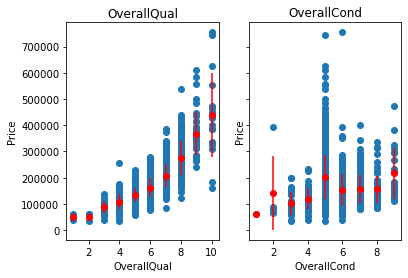

In [12]:
# check relationships of overall qualities of house and prices
fig, axes = plt.subplots(1, 2, sharey=True)

OverallQual, OverallQual_avg, OverallQual_std = get_avg_std("OverallQual")
OverallCond, OverallCond_avg, OverallCond_std = get_avg_std("OverallCond")

axes[0].scatter(train_data["OverallQual"], train_data["SalePrice"])
axes[0].errorbar(OverallQual, OverallQual_avg, yerr=OverallQual_std, fmt="ro", label="avg_price")
axes[0].set_title("OverallQual")
axes[0].set_xlabel("OverallQual")
axes[0].set_ylabel("Price")

axes[1].scatter(train_data["OverallCond"], train_data["SalePrice"])
axes[1].errorbar(OverallCond, OverallCond_avg, yerr=OverallCond_std, fmt="ro", label="avg_price")
axes[1].set_title("OverallCond")
axes[1].set_xlabel("OverallCond")
axes[1].set_ylabel("Price")

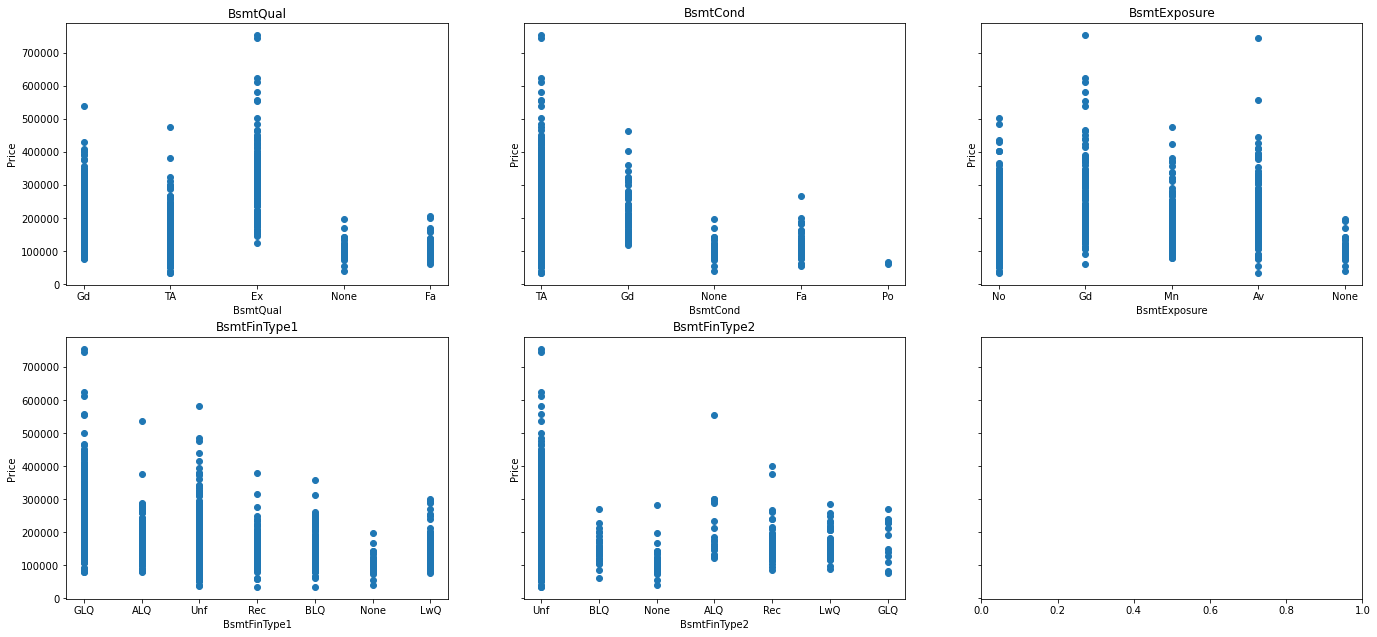

In [13]:
# check relationships of basements and prices
fig, axes = plt.subplots(2, 3, sharey=True)

BsmtQual = train_data.replace({np.nan: "None"}, inplace=False)["BsmtQual"]
BsmtCond = train_data.replace({np.nan: "None"}, inplace=False)["BsmtCond"]
BsmtExposure = train_data.replace({np.nan: "None"}, inplace=False)["BsmtExposure"]
BsmtFinType1 = train_data.replace({np.nan: "None"}, inplace=False)["BsmtFinType1"]
BsmtFinType2 = train_data.replace({np.nan: "None"}, inplace=False)["BsmtFinType2"]

axes[0][0].scatter(BsmtQual, train_data["SalePrice"])
axes[0][0].set_title("BsmtQual")
axes[0][0].set_xlabel("BsmtQual")
axes[0][0].set_ylabel("Price")

axes[0][1].scatter(BsmtCond, train_data["SalePrice"])
axes[0][1].set_title("BsmtCond")
axes[0][1].set_xlabel("BsmtCond")
axes[0][1].set_ylabel("Price")

axes[0][2].scatter(BsmtExposure, train_data["SalePrice"])
axes[0][2].set_title("BsmtExposure")
axes[0][2].set_xlabel("BsmtExposure")
axes[0][2].set_ylabel("Price")

axes[1][0].scatter(BsmtFinType1, train_data["SalePrice"])
axes[1][0].set_title("BsmtFinType1")
axes[1][0].set_xlabel("BsmtFinType1")
axes[1][0].set_ylabel("Price")

axes[1][1].scatter(BsmtFinType2, train_data["SalePrice"])
axes[1][1].set_title("BsmtFinType2")
axes[1][1].set_xlabel("BsmtFinType2")
axes[1][1].set_ylabel("Price")


plt.subplots_adjust(left=0, right=3, top=2, bottom=0)
plt.show()

C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, wh

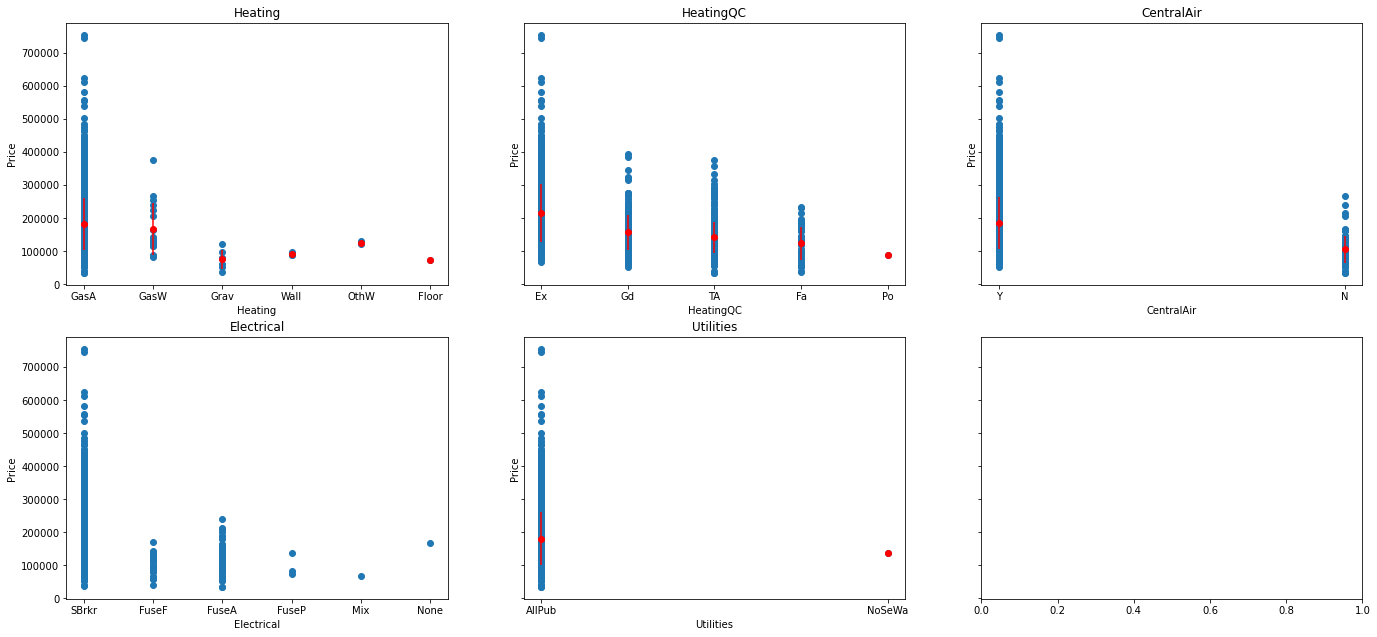

In [14]:
# checking relationships of utilities of house and prices

fig, axes = plt.subplots(2, 3, sharey=True)

Heating, Heating_avg, Heating_std = get_avg_std("Heating")
HeatingQC, HeatingQC_avg, HeatingQC_std = get_avg_std("HeatingQC")
CentralAir, CentralAir_avg, CentralAir_std = get_avg_std("CentralAir")
# Electrical, Electrical_avg, Electrical_std = get_avg_std("Electrical")
Utilities, Utilities_avg, Utilities_std = get_avg_std("Utilities")

Electrical = train_data.replace({np.nan: "None"}, inplace=False)["Electrical"]

axes[0][0].scatter(train_data["Heating"], train_data["SalePrice"])
axes[0][0].errorbar(Heating, Heating_avg, yerr=Heating_std, fmt="ro", label="avg_price")
axes[0][0].set_title("Heating")
axes[0][0].set_xlabel("Heating")
axes[0][0].set_ylabel("Price")

axes[0][1].scatter(train_data["HeatingQC"], train_data["SalePrice"])
axes[0][1].errorbar(HeatingQC,HeatingQC_avg, yerr=HeatingQC_std, fmt="ro", label="avg_price")
axes[0][1].set_title("HeatingQC")
axes[0][1].set_xlabel("HeatingQC")
axes[0][1].set_ylabel("Price")

axes[0][2].scatter(train_data["CentralAir"], train_data["SalePrice"])
axes[0][2].errorbar(CentralAir, CentralAir_avg, yerr=CentralAir_std, fmt="ro", label="avg_price")
axes[0][2].set_title("CentralAir")
axes[0][2].set_xlabel("CentralAir")
axes[0][2].set_ylabel("Price")

axes[1][0].scatter(Electrical, train_data["SalePrice"])
axes[1][0].set_title("Electrical")
axes[1][0].set_xlabel("Electrical")
axes[1][0].set_ylabel("Price")

axes[1][1].scatter(train_data["Utilities"], train_data["SalePrice"])
axes[1][1].errorbar(Utilities, Utilities_avg, yerr=Utilities_std, fmt="ro", label="avg_price")
axes[1][1].set_title("Utilities")
axes[1][1].set_xlabel("Utilities")
axes[1][1].set_ylabel("Price")


plt.subplots_adjust(left=0, right=3, top=2, bottom=0)
plt.show()

C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\danie\anaconda3\envs\my-env\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


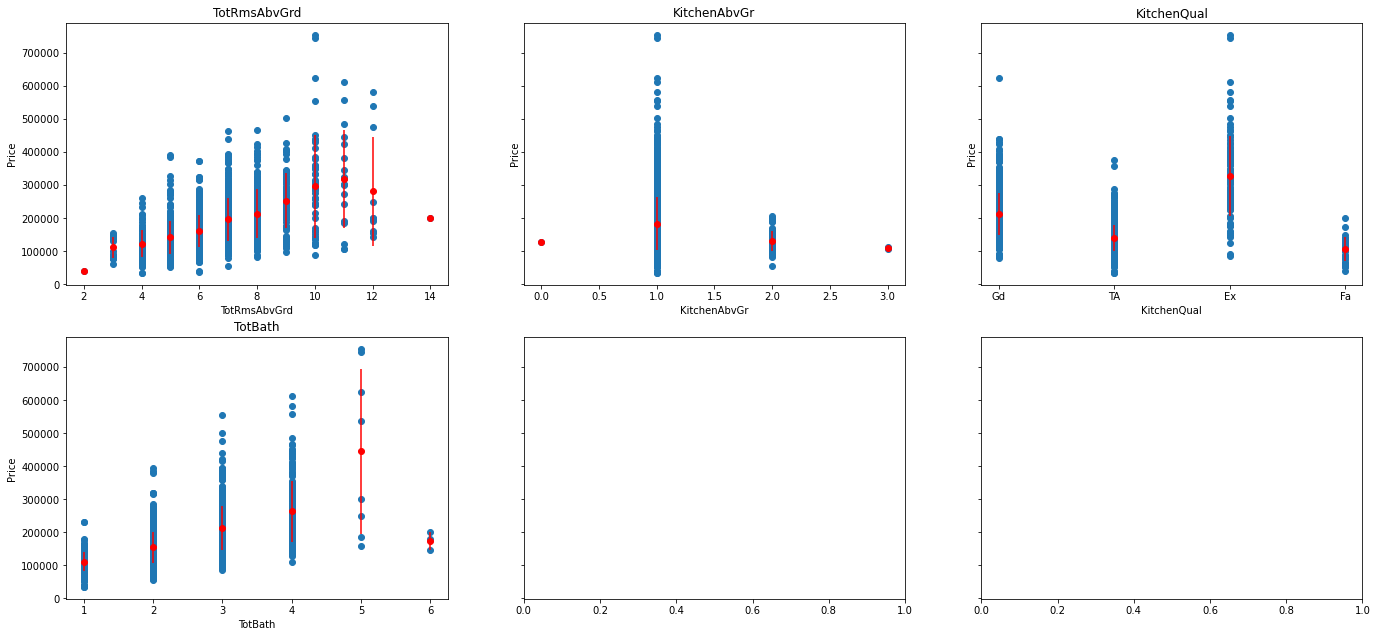

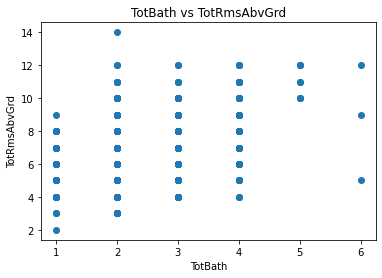

In [15]:
# check relationships of rooms and prices

fig, axes = plt.subplots(2, 3, sharey=True)

TotRmsAbvGrd, TotRmsAbvGrd_avg, TotRmsAbvGrd_std = get_avg_std("TotRmsAbvGrd")
KitchenAbvGr, KitchenAbvGr_avg,KitchenAbvGr_std = get_avg_std("KitchenAbvGr")
KitchenQual, KitchenQual_avg, KitchenQual_std = get_avg_std("KitchenQual")
train_data["TotBath"] = train_data["BsmtFullBath"] + train_data["BsmtHalfBath"] + train_data["FullBath"] + train_data["HalfBath"]
TotBath, TotBath_avg, TotBath_std = get_avg_std("TotBath")

axes[0][0].scatter(train_data["TotRmsAbvGrd"], train_data["SalePrice"])
axes[0][0].errorbar(TotRmsAbvGrd, TotRmsAbvGrd_avg, yerr=TotRmsAbvGrd_std, fmt="ro", label="avg_price")
axes[0][0].set_title("TotRmsAbvGrd")
axes[0][0].set_xlabel("TotRmsAbvGrd")
axes[0][0].set_ylabel("Price")

axes[0][1].scatter(train_data["KitchenAbvGr"], train_data["SalePrice"])
axes[0][1].errorbar(KitchenAbvGr,KitchenAbvGr_avg, yerr=KitchenAbvGr_std, fmt="ro", label="avg_price")
axes[0][1].set_title("KitchenAbvGr")
axes[0][1].set_xlabel("KitchenAbvGr")
axes[0][1].set_ylabel("Price")

axes[0][2].scatter(train_data["KitchenQual"], train_data["SalePrice"])
axes[0][2].errorbar(KitchenQual, KitchenQual_avg, yerr=KitchenQual_std, fmt="ro", label="avg_price")
axes[0][2].set_title("KitchenQual")
axes[0][2].set_xlabel("KitchenQual")
axes[0][2].set_ylabel("Price")

axes[1][0].scatter(train_data["TotBath"], train_data["SalePrice"])
axes[1][0].errorbar(TotBath, TotBath_avg, yerr=TotBath_std, fmt="ro", label="avg_price")
axes[1][0].set_title("TotBath")
axes[1][0].set_xlabel("TotBath")
axes[1][0].set_ylabel("Price")

plt.subplots_adjust(left=0, right=3, top=2, bottom=0)
plt.figure()

plt.scatter(train_data["TotBath"], train_data["TotRmsAbvGrd"])
plt.title("TotBath vs TotRmsAbvGrd")
plt.xlabel("TotBath")
plt.ylabel("TotRmsAbvGrd")
plt.show()


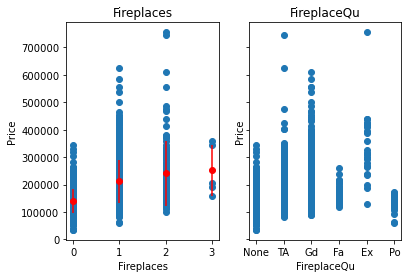

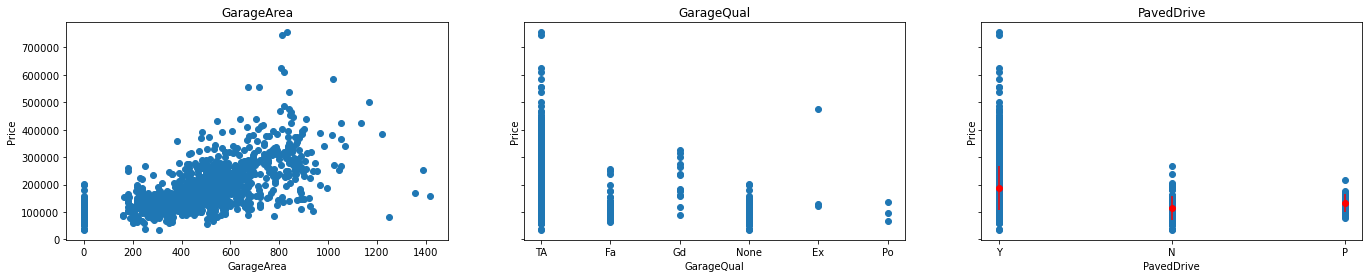

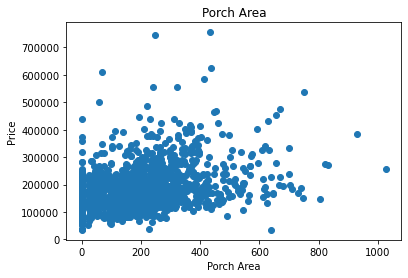

<Figure size 432x288 with 0 Axes>

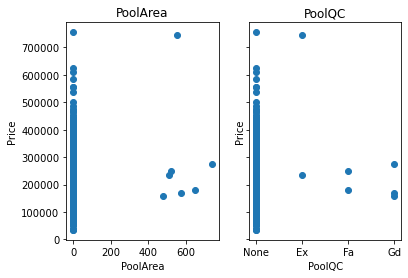

<Figure size 432x288 with 0 Axes>

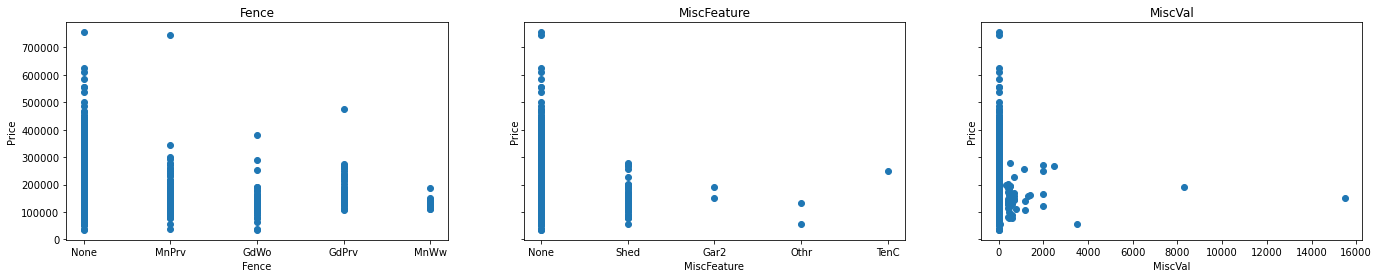

In [16]:
# check relationships of fireplace, garage, porch, pool, fence and prices
fig0, axes = plt.subplots(1, 2, sharey=True)

Fireplaces, Fireplaces_avg, Fireplaces_std = get_avg_std("Fireplaces")
FireplaceQu = train_data.replace({np.nan: "None"}, inplace=False)["FireplaceQu"]

axes[0].scatter(train_data["Fireplaces"], train_data["SalePrice"])
axes[0].errorbar(Fireplaces, Fireplaces_avg, yerr=Fireplaces_std, fmt="ro", label="avg_price")
axes[0].set_title("Fireplaces")
axes[0].set_xlabel("Fireplaces")
axes[0].set_ylabel("Price")

axes[1].scatter(FireplaceQu, train_data["SalePrice"])
axes[1].set_title("FireplaceQu")
axes[1].set_xlabel("FireplaceQu")
axes[1].set_ylabel("Price")

fig1, axes = plt.subplots(1, 3, sharey=True)

GarageQual = train_data.replace({np.nan: "None"}, inplace=False)["GarageQual"]
PavedDrive, PavedDrive_avg,PavedDrive_std = get_avg_std("PavedDrive")

axes[0].scatter(train_data["GarageArea"], train_data["SalePrice"])
axes[0].set_title("GarageArea")
axes[0].set_xlabel("GarageArea")
axes[0].set_ylabel("Price")

axes[1].scatter(GarageQual, train_data["SalePrice"])
axes[1].set_title("GarageQual")
axes[1].set_xlabel("GarageQual")
axes[1].set_ylabel("Price")

axes[2].scatter(train_data["PavedDrive"], train_data["SalePrice"])
axes[2].errorbar(PavedDrive,PavedDrive_avg, yerr=PavedDrive_std, fmt="ro", label="avg_price")
axes[2].set_title("PavedDrive")
axes[2].set_xlabel("PavedDrive")
axes[2].set_ylabel("Price")

plt.subplots_adjust(left=0, right=3)

plt.figure()

Porch = train_data["WoodDeckSF"] + train_data["OpenPorchSF"] + train_data["EnclosedPorch"] + train_data["3SsnPorch"] + train_data["ScreenPorch"]
plt.scatter(Porch, train_data["SalePrice"])
plt.xlabel("Porch Area")
plt.ylabel("Price")
plt.title("Porch Area")

plt.figure()

fig0, axes = plt.subplots(1, 2, sharey=True)

PoolQC = train_data.replace({np.nan: "None"}, inplace=False)["PoolQC"]

axes[0].scatter(train_data["PoolArea"], train_data["SalePrice"])
axes[0].set_title("PoolArea")
axes[0].set_xlabel("PoolArea")
axes[0].set_ylabel("Price")

axes[1].scatter(PoolQC, train_data["SalePrice"])
axes[1].set_title("PoolQC")
axes[1].set_xlabel("PoolQC")
axes[1].set_ylabel("Price")

plt.figure()

fig1, axes = plt.subplots(1, 3, sharey=True)

Fence = train_data.replace({np.nan: "None"}, inplace=False)["Fence"]
MiscFeature = train_data.replace({np.nan: "None"}, inplace=False)["MiscFeature"]

axes[0].scatter(Fence, train_data["SalePrice"])
axes[0].set_title("Fence")
axes[0].set_xlabel("Fence")
axes[0].set_ylabel("Price")

axes[1].scatter(MiscFeature, train_data["SalePrice"])
axes[1].set_title("MiscFeature")
axes[1].set_xlabel("MiscFeature")
axes[1].set_ylabel("Price")

axes[2].scatter(train_data["MiscVal"], train_data["SalePrice"])
axes[2].set_title("MiscVal")
axes[2].set_xlabel("MiscVal")
axes[2].set_ylabel("Price")

plt.subplots_adjust(left=0, right=3)

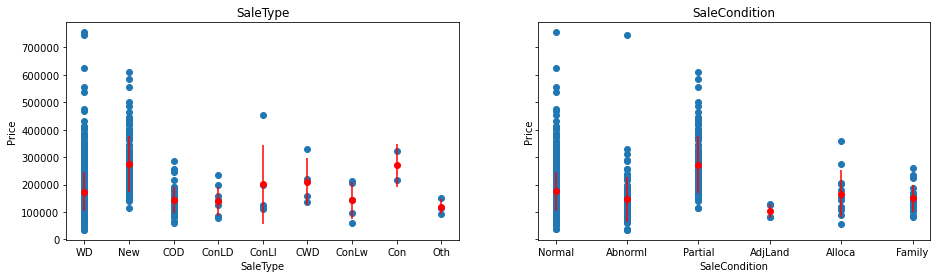

In [17]:
# check relationshipd of saletype and saleCondition and prices
fig0, axes = plt.subplots(1, 2, sharey=True)

SaleType, SaleType_avg, SaleType_std = get_avg_std("SaleType")
SaleCondition, SaleCondition_avg, SaleCondition_std = get_avg_std("SaleCondition")

axes[0].scatter(train_data["SaleType"], train_data["SalePrice"])
axes[0].errorbar(SaleType, SaleType_avg, yerr=SaleType_std, fmt="ro", label="avg_price")
axes[0].set_title("SaleType")
axes[0].set_xlabel("SaleType")
axes[0].set_ylabel("Price")

axes[1].scatter(train_data["SaleCondition"], train_data["SalePrice"])
axes[1].errorbar(SaleCondition, SaleCondition_avg, yerr=SaleCondition_std, fmt="ro", label="avg_price")
axes[1].set_title("SaleCondition")
axes[1].set_xlabel("SaleCondition")
axes[1].set_ylabel("Price")

plt.subplots_adjust(left=0, right=2)

In [54]:
!pip install plotly

# Preprocess Data

## Parameters to use:

- First priority: GrLivArea, OverallQual, TotalBsmtSF, bsmtqual, bsmtcond, KitchenQual, TotRmsAbvGrd, TotBath(self-added feature), PavedDrive
- Second priority: MSSubClass, MsZoning, YearBuilt, remodeled?(one hot), Lotfrontage, street, alley, neighborhood, condition1, condition2, exterqual, extercond, OverallCond, Heating, HeatinQC, CentralAir, Electrical, Fireplace, FireplaceQu, Fence, SaleType, SaleCondition
- Third priority: lotshape, landcontour, lotconfig, landslope, bldgtype, housestyle, masvnrarea, masvnrtype

### Approach:
- First Try: 
    - Only use fields listed in the first priority because from the plot above they seem to affect the house prices the most
    - No missing values in numerical values column
    - Missing values in non-numerical values column indicate the house does not have that property, thus filled with "None"

In [5]:
train_data["TotBath"] = train_data["BsmtFullBath"] + train_data["BsmtHalfBath"] + train_data["FullBath"] + train_data["HalfBath"]

chosen_columns = ["GrLivArea", "OverallQual", "TotalBsmtSF", "BsmtQual", "BsmtCond", "KitchenQual", "TotRmsAbvGrd", "TotBath", "PavedDrive", "SalePrice"]
new_df = train_data[chosen_columns]
new_df = new_df.replace({np.nan: "None"}, inplace=False)
new_df.head()

,GrLivArea,OverallQual,TotalBsmtSF,BsmtQual,BsmtCond,KitchenQual,TotRmsAbvGrd,TotBath,PavedDrive,SalePrice
Id,,,,,,,,,,
1,1710,7,856,Gd,TA,Gd,8,4,Y,208500
2,1262,6,1262,Gd,TA,TA,6,3,Y,181500
3,1786,7,920,Gd,TA,Gd,6,4,Y,223500
4,1717,7,756,TA,Gd,Gd,7,2,Y,140000
5,2198,8,1145,Gd,TA,Gd,9,4,Y,250000


## Idea:
- Turn all non numerical values into one-hot encoding
- normalized the numerical values so that each properties has the same weights

### Create one-hot encoding columns

In [10]:
one_hot_df = pd.get_dummies(new_df, columns=['BsmtQual', "BsmtCond", "KitchenQual", "PavedDrive"])
# one_hot_TotBsmtQual.drop("BsmtQual")
one_hot_df.head()

,GrLivArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,TotBath,SalePrice,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,...,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,1710,7,856,8,4,208500,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,1262,6,1262,6,3,181500,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,1786,7,920,6,4,223500,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,1717,7,756,7,2,140000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,2198,8,1145,9,4,250000,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


### Normalize numerical value columns

In [11]:
def normalize_column(df, columns):
    mean_columns = []
    std_columns = []
    for column in columns:
        mean_val = df[column].mean()
        std_val = df[column].std()
        df[column] = (df[column] - mean_val) / std_val
        mean_columns.append(mean_val)
        std_columns.append(std_val)
    
    return mean_columns, std_columns

mean_cols, std_cols = normalize_column(one_hot_df, ["GrLivArea", "OverallQual", "TotalBsmtSF", "TotRmsAbvGrd", "TotBath"])

# we will use mean_cols and std_cols when normalizing the values in the test data
print(mean_cols)
print(std_cols)

target = one_hot_df["SalePrice"]


one_hot_train = one_hot_df.drop(["SalePrice"], axis=1)
one_hot_train.head()

# one_hot_array = one_hot_df.to_numpy()
# one_hot_array

[1515.463698630137, 6.0993150684931505, 1057.4294520547944, 6.517808219178082, 2.430821917808219]
[525.4803834232027, 1.3829965467415923, 438.7053244594705, 1.625393290584064, 0.9226466882706077]


,GrLivArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,TotBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,...,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,0.370207,0.651256,-0.459145,0.911897,1.700736,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,-0.482347,-0.071812,0.466305,-0.318574,0.616897,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,0.514836,0.651256,-0.313261,-0.318574,1.700736,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0.383528,0.651256,-0.687089,0.296662,-0.466941,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,1.298881,1.374324,0.199611,1.527133,1.700736,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [50]:
print(np.argmax(target, axis=-1))
print(target[691+1])

691
755000


### prepare training set, validation set, and testing set

In [12]:
target_data = target.to_numpy(dtype="float32")
training_data = one_hot_train.to_numpy(dtype="float32") 

In [13]:
training_data.shape

(1460, 22)

In [14]:
target_data.shape

(1460,)

In [15]:
permutation = np.random.permutation(len(training_data))

training_data = training_data[permutation]
target_data = target_data[permutation]

In [16]:
# split the data into training set, validation set, test set
num_train = 500
num_val = 500

train_input = training_data[:num_train]
train_target = target_data[:num_train]
validation_input = training_data[num_train: (num_train+num_val)]
validation_target = target_data[num_train: (num_train+num_val)]
test_input = training_data[(num_train+num_val):]
test_target = target_data[(num_train+num_val):]


In [17]:
print(f"train_shape: {train_input.shape}, validation_shape: {validation_input.shape}, test_shape: {test_input.shape}")
print(f"train_target: {train_target.shape}, validation_target: {validation_target.shape}, test_target: {test_target.shape}")

train_shape: (500, 22), validation_shape: (500, 22), test_shape: (460, 22)
train_target: (500,), validation_target: (500,), test_target: (460,)


# Build Model

- First Try: Build a 6-layers sequential model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
num_variables = training_data.shape[1]

def get_model(num_variables):
    model = keras.Sequential([
        keras.Input(shape=(num_variables,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="relu")
    ])
    
    model.compile(optimizer="rmsprop",
             loss="msle",
             metrics=[tf.metrics.RootMeanSquaredError()])
    return model

model = get_model(num_variables=num_variables)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               5888      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [27]:
# epochs: 50 -> 100 -> 200 -> 100
epochs=100
batch_size=16

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    "6_layer_sequential.keras",
    monitor="val_loss",
    save_best_only=True),
#     keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=10)
]

In [29]:
history = model.fit(train_input, train_target,
                   epochs=epochs,
                   batch_size=batch_size,
#                     callbacks=callbacks,
                   validation_data=(validation_input, validation_target),)

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 65.1715 - root_mean_squared_error: 198211.9219 - val_loss: 26.6805 - val_root_mean_squared_error: 199727.3438
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 15.6382 - root_mean_squared_error: 194141.4688 - val_loss: 7.0032 - val_root_mean_squared_error: 188864.9688
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4974 - root_mean_squared_error: 168142.2812 - val_loss: 0.9810 - val_root_mean_squared_error: 137966.3594
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3504 - root_mean_squared_error: 97902.1875 - val_loss: 0.0765 - val_root_mean_squared_error: 60044.2617
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0460 - root_mean_squared_error: 44203.0234 - val_loss: 0.0473 - val_root_mean_squared_error: 49198.2266
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0314 - root_mean_squa

32/32 [==============================] - 0s 3ms/step - loss: 0.0174 - root_mean_squared_error: 25725.2109 - val_loss: 0.0392 - val_root_mean_squared_error: 52095.6289
Epoch 92/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0168 - root_mean_squared_error: 25807.0977 - val_loss: 0.0375 - val_root_mean_squared_error: 48930.2617
Epoch 93/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0165 - root_mean_squared_error: 25518.1133 - val_loss: 0.0371 - val_root_mean_squared_error: 49747.5781
Epoch 94/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0172 - root_mean_squared_error: 25926.7266 - val_loss: 0.0451 - val_root_mean_squared_error: 50908.9102
Epoch 95/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0163 - root_mean_squared_error: 24985.7285 - val_loss: 0.0376 - val_root_mean_squared_error: 50934.6875
Epoch 96/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0165 - root_mean_squared_error: 25722

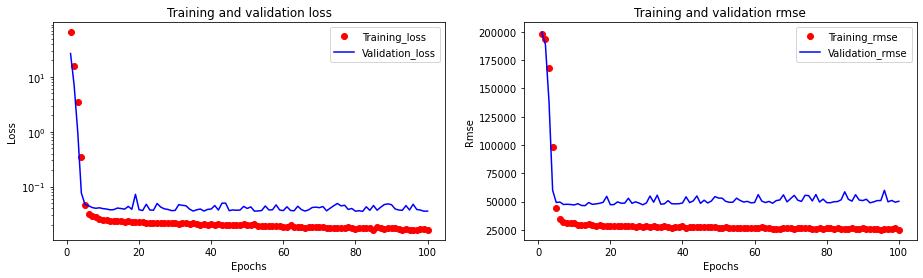

Lowest val_loss occurred at epochs: 81


In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_rmse = history.history["root_mean_squared_error"]
val_rmse = history.history["val_root_mean_squared_error"]
num_epochs = [i for i in range(1, len(val_loss)+1)]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.semilogy(num_epochs, loss, "ro", label="Training_loss")
ax1.semilogy(num_epochs, val_loss, "b-", label="Validation_loss")
ax1.set_title("Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(num_epochs, train_rmse, "ro", label="Training_rmse")
ax2.plot(num_epochs, val_rmse, "b-", label="Validation_rmse")
ax2.set_title("Training and validation rmse")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Rmse")
ax2.legend()

plt.subplots_adjust(left=0, right=2)
plt.show()

print(f"Lowest val_loss occurred at epochs: {np.argmin(val_loss, axis=-1)}")


### Observation from loss and rmse graph
- with 6-layers model and 200 epochs, overfitting is ovesrved
    - the data is not informative enough to make further improvement on prediction

# Evaluate the model

In [33]:
model = keras.models.load_model("6_layer_sequential.keras")
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               5888      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [47]:
# 隨機抽樣樣本
i = np.argmax(target_data, axis=-1)
prediction = model.predict(np.expand_dims(training_data[i], axis=0))
print(f"Prediction: {prediction}")
print(f"Target: {target_data[i]}")

Prediction: [[502615.84]]
Target: 755000.0


In [35]:
test_loss, test_rmse = model.evaluate(test_input, test_target)
test_loss

15/15 [==============================] - 0s 1ms/step - loss: 0.0230 - root_mean_squared_error: 29306.3457


0.023012148216366768

# Make predictions

### Observation on the test_data
- There are value in "KitchenQual" that are not appeared in the train_data ("None")
    - First try: Drop the ont_hot_encoding column "KitchenQual_None"
    - Future: Use another model to predict that value in the "KitchenQual" column, then make the predictions
- In test_data id 2121, "TotalBsmtSF" and "BsmtFullBath", "BsmtHalfBath" are missing values (not appeared in train_data)
- In test_data id 2189, "BsmtFullBath", "BsmtHalfBath" are missing values (not appeared in train_data)
    - First try: set those values to mean values calculated from other rows in their respective columns
    - Future: Use another model to predict those values first, then make the predictions

In [ ]:
import pandas as pd
test_data = pd.read_csv("test.csv", index_col=0)

In [36]:
mean_totBsmtSF = train_data["TotalBsmtSF"].mean()
mean_BsmtFullBath = train_data["BsmtFullBath"].mean()
mean_BsmtHalfBath = train_data["BsmtHalfBath"].mean()
print(mean_totBsmtSF, mean_BsmtFullBath, mean_BsmtHalfBath)

test_data["TotalBsmtSF"] = test_data["TotalBsmtSF"].fillna(mean_totBsmtSF)
BsmtFullBath = test_data["BsmtFullBath"].fillna(mean_BsmtFullBath)
BsmtHalfBath = test_data["BsmtHalfBath"].fillna(mean_BsmtHalfBath)

1057.4294520547944 0.42534246575342466 0.057534246575342465


In [37]:
test_data["TotBath"] = BsmtFullBath + BsmtHalfBath + test_data["FullBath"] + test_data["HalfBath"]
chosen_columns = ["GrLivArea", "OverallQual", "TotalBsmtSF", "BsmtQual", "BsmtCond", "KitchenQual", "TotRmsAbvGrd", "TotBath", "PavedDrive"]

test_df = test_data[chosen_columns]
test_df = test_df.replace({np.nan: "None"}, inplace=False)

### Create one-hot-encoding columns

In [38]:
one_hot_test_df = pd.get_dummies(test_df, columns=['BsmtQual', "BsmtCond", "KitchenQual", "PavedDrive"])
one_hot_test_df = one_hot_test_df.drop(["KitchenQual_None"], axis=1) # no None data in training set
one_hot_test_df.head()

,GrLivArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,TotBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,...,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1461,896,5,882.0,5,1.0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1462,1329,6,1329.0,6,2.0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1463,1629,5,928.0,6,3.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1464,1604,6,926.0,7,3.0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1465,1280,8,1280.0,5,2.0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


### Normalize numerical values columns (using mean and std from training data)

In [40]:
# mean_cols and std_cols is already acquired when we normalize numerical values columns of training data
def normalize_test_data(df, columns):
    for i in range(len(columns)):
        mean_val = mean_cols[i]
        std_val = std_cols[i]
        df[columns[i]] = (df[columns[i]] - mean_val) / std_val

normalize_column(one_hot_test_df, ["GrLivArea", "OverallQual", "TotalBsmtSF", "TotRmsAbvGrd", "TotBath"])

one_hot_test_df.head()

,GrLivArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,TotBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,...,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1461,-1.215171,-0.750844,-0.370699,-0.918020,-1.505431,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1462,-0.323429,-0.054858,0.638908,-0.255283,-0.465933,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1463,0.294407,-0.750844,-0.266802,-0.255283,0.573565,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1464,0.242921,-0.054858,-0.271319,0.407454,0.573565,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1465,-0.424342,1.337113,0.528235,-0.918020,-0.465933,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [41]:
inputs = one_hot_test_df.to_numpy(dtype="float32") 
inputs.shape

(1459, 22)

In [42]:
predictions = model.predict(inputs)

# 隨機抽樣樣本
i = 10
prediction = model.predict(np.expand_dims(inputs[i], axis=0))
print(f"Prediction: {prediction}")

Prediction: [[213656.]]


# Output the predictions to a csv file

In [43]:
df = pd.DataFrame(predictions, columns = ["SalePrice"], index = range(1461, 1461+predictions.shape[0]))
df.to_csv('submission1.csv', index_label='Id')

# Submit submission to Kaggle

In [45]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission1.csv -m "Using a 6-layer sequential DNN model with only 9 properties to predict the house prices"

Successfully submitted to House Prices - Advanced Regression Techniques



  0%|          | 0.00/22.6k [00:00<?, ?B/s]
100%|██████████| 22.6k/22.6k [00:03<00:00, 7.06kB/s]
